In [1]:
#import the csv file
import numpy as np
import pandas as pd
import chardet
file = r"C:\Users\93691\Documents\DATA1030-Fall2021\YingSun_DATA1030_project\data\new.csv"
df_origin = pd.read_csv(file,encoding='ISO-8859-1',low_memory=False) #use low_memory=False in case columns have mixed type. 
df = df_origin.drop(columns=['url','id','Lng','Lat','Cid']) # create a new df in case of some origin features will be used later
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result
df = df.replace("????" and "nan",np.nan)
pd.set_option('display.max_columns', None) #display all columns
df.head(5)

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,¸ß 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,¸ß 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,ÖÐ 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,µ× 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,ÖÐ 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [2]:
# change to the right data type
df['livingRoom'] = df['livingRoom'].apply(pd.to_numeric, errors='coerce')
df['drawingRoom'] = df['drawingRoom'].apply(pd.to_numeric, errors='coerce')
df['bathRoom'] = df['bathRoom'].apply(pd.to_numeric, errors='coerce')
df['constructionTime'] = df['constructionTime'].apply(pd.to_numeric, errors='coerce')
print("done")

done


In [3]:
#convert tradeTime to int by delete "-"
df['tradeTime'] = df['tradeTime'].str.replace('-', '').astype(int)
print("done")

done


In [4]:
#only keep the integer part in floor
def floor_int(x):
    try:
        return int(x.split(' ')[1])
    except:
        return np.nan
df['floor'] = df['floor'].apply(floor_int)
print("done")

done


In [5]:
#some building type is <1, while it is a categorical feature, it only be 1,2,3,4. 
#I found that all other values except for 1:4 are all <1, so I use <1 here. 
df = df[df['buildingType']>=1]
print("done")

done


In [6]:
#check if all data are good to use
df.head(10)

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,20160809,1464.0,106,415.0,31680,131.00,2.0,1.0,1,1.0,26.0,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,20160728,903.0,126,575.0,43436,132.38,2.0,2.0,1,2.0,22.0,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,20161211,1271.0,48,1030.0,52021,198.00,3.0,2.0,1,3.0,4.0,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,20160930,965.0,138,297.5,22202,134.00,3.0,1.0,1,1.0,21.0,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,20160828,927.0,286,392.0,48396,81.00,2.0,1.0,1,1.0,6.0,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0
5,20160722,861.0,57,275.6,52000,53.00,1.0,0.0,1,1.0,8.0,4.0,2005.0,3,6,0.333,1.0,1.0,0.0,7,67738.0
6,20160714,851.0,167,275.0,37672,73.00,2.0,1.0,1,1.0,6.0,4.0,1997.0,4,2,0.500,0.0,0.0,0.0,7,50112.0
7,20160907,904.0,138,800.0,49521,161.55,3.0,2.0,1,2.0,22.0,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0
8,20160904,873.0,218,134.0,27917,48.00,1.0,0.0,1,1.0,10.0,3.0,2009.0,1,2,0.333,0.0,0.0,0.0,13,44235.0
9,20160905,865.0,134,380.0,55883,68.00,1.0,0.0,0,0.0,23.0,1.0,2009.0,4,6,0.308,1.0,1.0,1.0,1,78590.0


# EDA

In [7]:
print('number of rows:',len(df),'number of columns:',len(df.columns))

number of rows: 316798 number of columns: 21


In [8]:
df.dtypes

tradeTime                int32
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom             float64
drawingRoom            float64
kitchen                  int64
bathRoom               float64
floor                  float64
buildingType           float64
constructionTime       float64
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

In [9]:
df.describe()

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,3.167980e+05,159535.000000,316798.000000,316798.000000,316798.000000,316798.00000,316798.000000,316798.000000,316798.000000,316798.000000,316798.00000,316798.000000,297990.000000,316798.000000,316798.000000,3.167980e+05,316798.000000,316798.000000,316798.000000,316798.000000,316448.000000
mean,2.014848e+07,28.727590,16.705361,347.800230,43567.503422,82.81751,2.004549,1.169446,0.994460,1.183609,13.34063,3.010057,1999.191121,2.605995,4.451704,6.357148e+01,0.579578,0.646639,0.602744,6.767391,63784.101713
std,1.651528e+04,50.014776,34.105067,224.256035,21686.633884,35.95013,0.767889,0.518773,0.104133,0.424924,7.81986,1.269642,8.774970,1.311764,1.901567,2.514960e+04,0.493628,0.478014,0.489331,2.812653,22308.136499
min,2.002060e+07,1.000000,0.000000,0.100000,1.000000,7.37000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1914.000000,1.000000,1.000000,1.400000e-02,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,2.013113e+07,1.000000,0.000000,205.000000,28090.250000,57.90000,1.000000,1.000000,1.000000,1.000000,6.00000,1.000000,1994.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46410.000000
50%,2.015091e+07,6.000000,5.000000,293.600000,38784.000000,74.15000,2.000000,1.000000,1.000000,1.000000,11.00000,4.000000,2001.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59025.000000
75%,2.016073e+07,37.000000,18.000000,425.000000,53870.000000,98.48000,2.000000,1.000000,1.000000,1.000000,20.00000,4.000000,2006.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,76001.000000
max,2.018013e+07,1677.000000,1143.000000,4900.000000,156250.000000,922.70000,9.000000,5.000000,3.000000,7.000000,63.00000,4.000000,2016.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [10]:
set(list(df['floor']))

{1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 42.0,
 57.0,
 63.0}

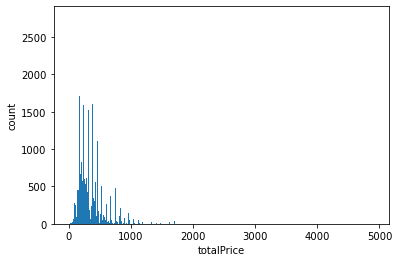

In [11]:
#single column

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

#target variable. cts. Histogram.
df['totalPrice'].plot.hist(bins = df['totalPrice'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
plt.xlabel('totalPrice')
plt.ylabel('count')
plt.show()

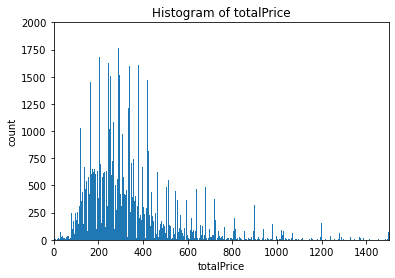

In [12]:
#To make the plot more clear, I graph portion (0,1500). This only shows a trend. Note that part of data are dropped
#some outliers dont show even in this plot. There should be some count >3000 in this range
df['totalPrice'].plot.hist(bins = df['totalPrice'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
plt.xlabel('totalPrice')
plt.ylabel('count')
plt.axis([0,1500,0,2000])
plt.title("Histogram of totalPrice")
plt.show()

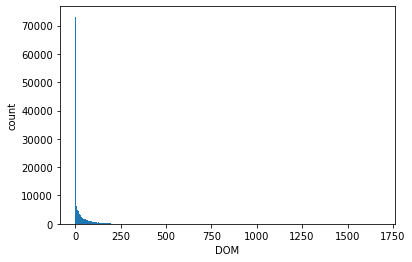

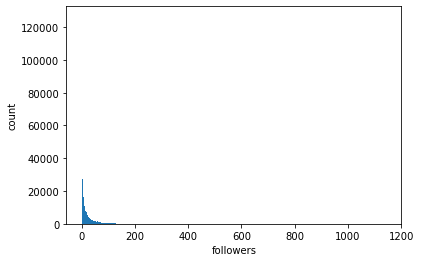

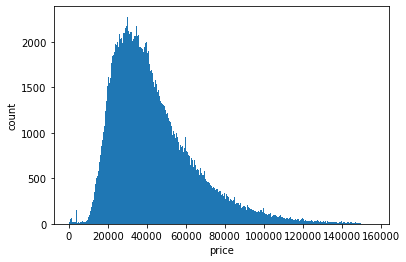

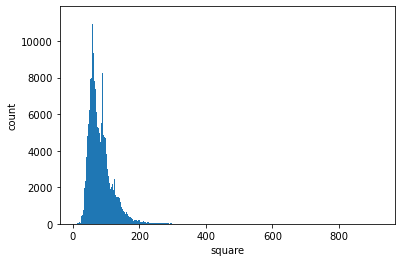

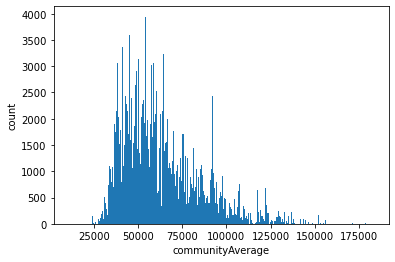

In [13]:
#continuous data. Histogram.
#features: DOM, followers, price, square, ladderRatio,communityAverage

list_cts = ('DOM', 'followers', 'price', 'ladderRatio','square','communityAverage')
list_cts_plot = ('DOM', 'followers', 'price','square','communityAverage')
for i in list_cts_plot:
    df[i].plot.hist(bins = int(np.sqrt(df.shape[0])))   # bins = int(np.sqrt(df.shape[0])) 
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

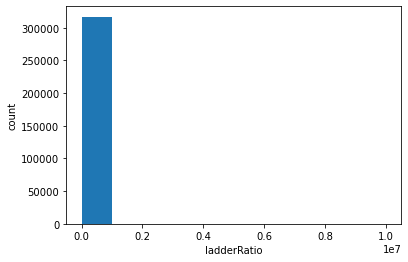

In [14]:
#the previous argument is not fit for ladderRatio
#df['ladderRatio'] = df['ladderRatio']*10000  #this doesn't work
df['ladderRatio'].plot.hist()   # bins = int(np.sqrt(df.shape[0])) 
plt.xlabel('ladderRatio')
plt.ylabel('count')
plt.show()

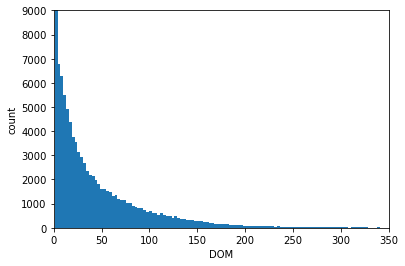

In [15]:
#focus on DOM ***only part of data!
df['DOM'].plot.hist(bins = int(np.sqrt(df.shape[0])))   # bins = int(np.sqrt(df.shape[0])) 
plt.xlabel('DOM')
plt.ylabel('count')
plt.axis([0,350,0,9000])
plt.show()

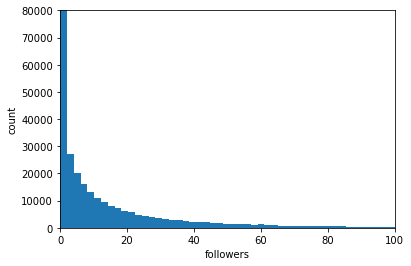

In [16]:
#focus on followers ***only part of data!
df['followers'].plot.hist(bins = int(np.sqrt(df.shape[0])))   # bins = int(np.sqrt(df.shape[0])) 
plt.xlabel('followers')
plt.ylabel('count')
plt.axis([0,100,0,80000]) # >>80000
plt.show()

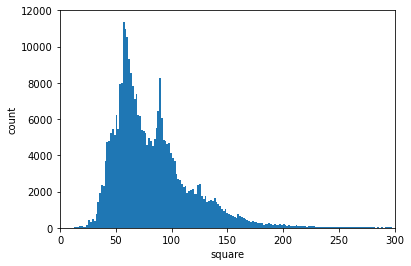

In [17]:
#focus on square ***only part of data!
df['square'].plot.hist(bins = int(np.sqrt(df.shape[0])))   # bins = int(np.sqrt(df.shape[0])) 
plt.xlabel('square')
plt.ylabel('count')
plt.axis([0,300,0,12000])
plt.show()

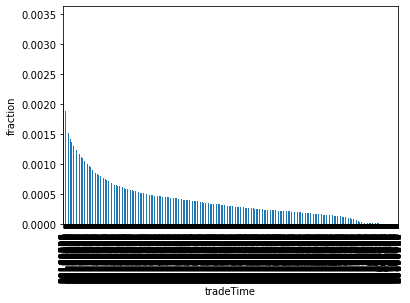

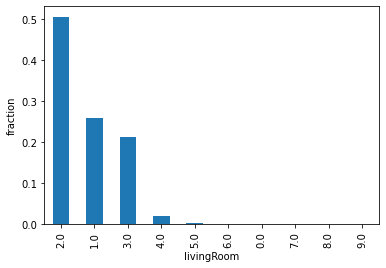

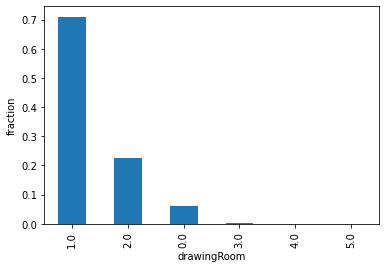

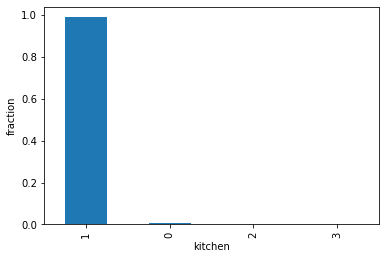

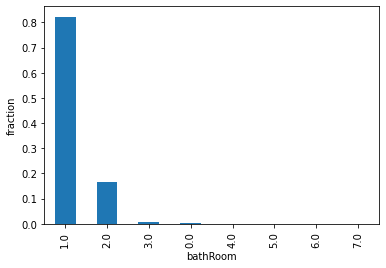

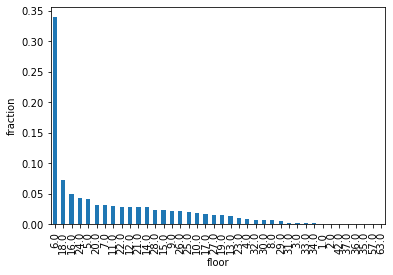

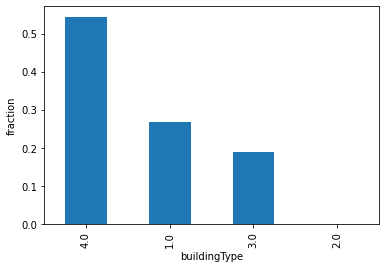

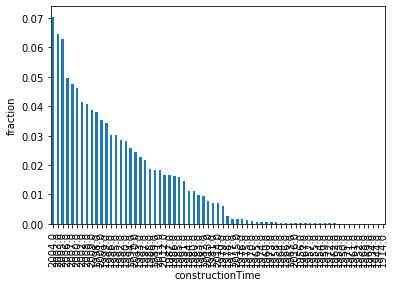

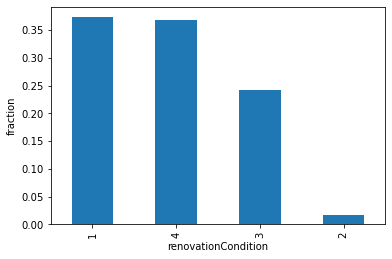

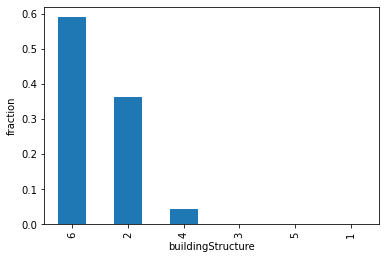

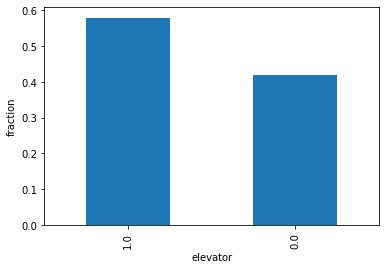

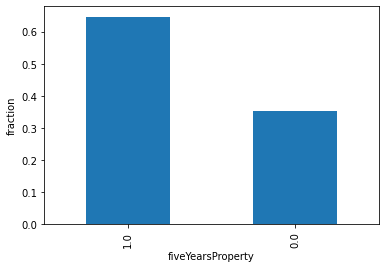

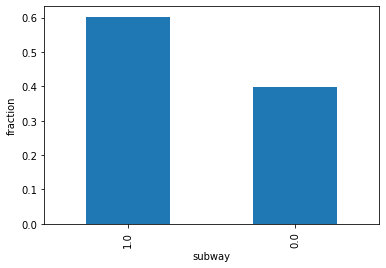

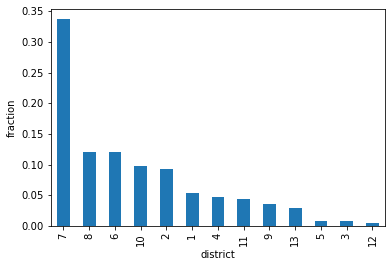

In [18]:
#categorical feature. Bar. ylable = fraction
#features: tradeTime, livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime, 
          #renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district
list_cate = ('tradeTime','livingRoom','drawingRoom','kitchen','bathRoom','floor','buildingType','constructionTime','renovationCondition','buildingStructure','elevator','fiveYearsProperty','subway','district')
for i in list_cate:
    pd.value_counts(df[i],normalize=True).plot.bar()
    plt.ylabel('fraction')
    plt.xlabel(i)
    plt.show()

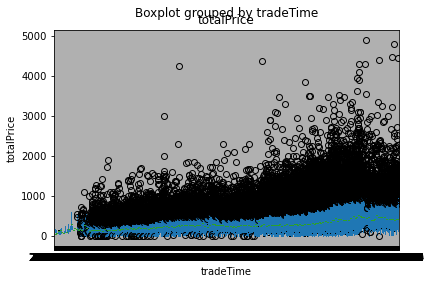

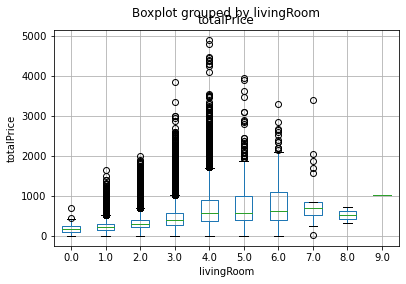

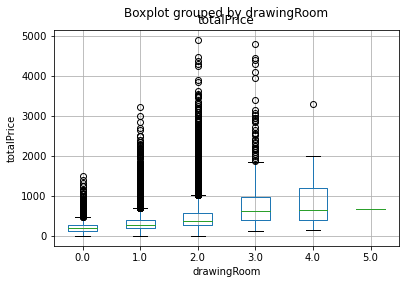

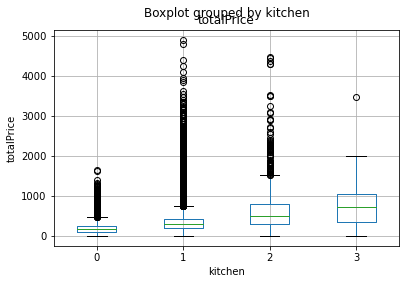

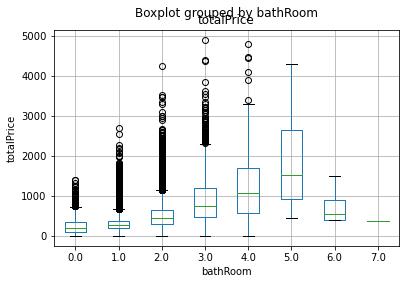

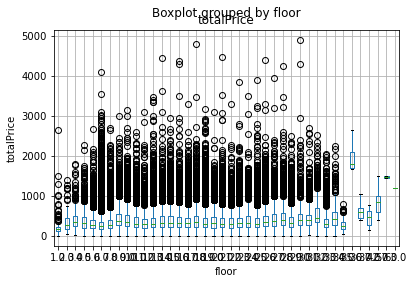

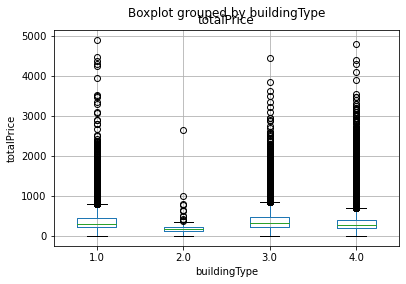

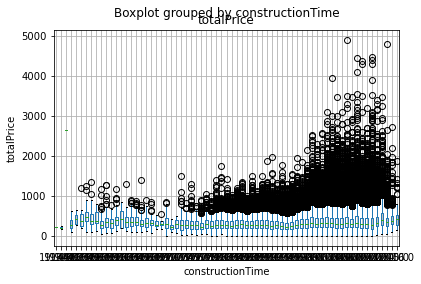

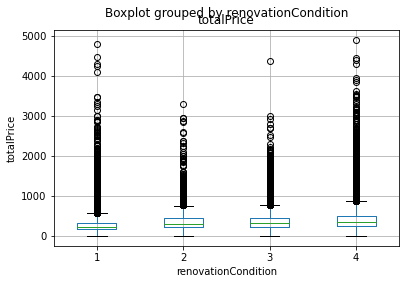

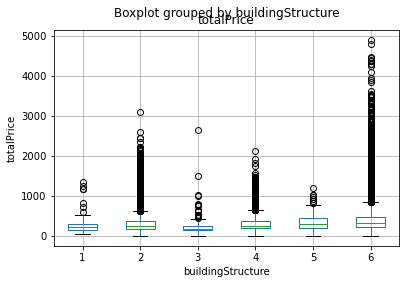

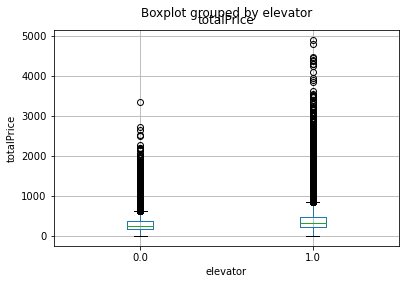

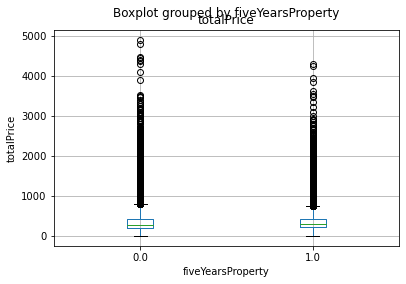

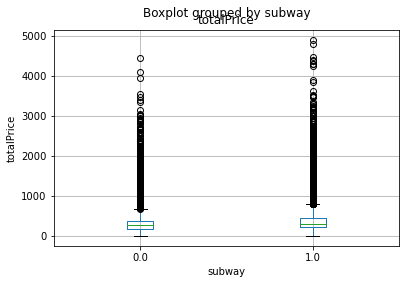

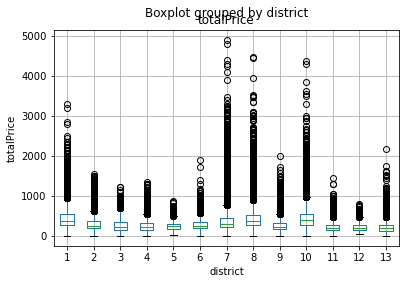

In [19]:
#two columns: feature and target variable

#continuous and categorical columns, can use cviolin plot, box plot and category-specific histograms. 
#Box plot is better here
for i in list_cate:
    df[['totalPrice',i]].boxplot(by=i)
    plt.ylabel('totalPrice')
    plt.xlabel(i)
    plt.show()

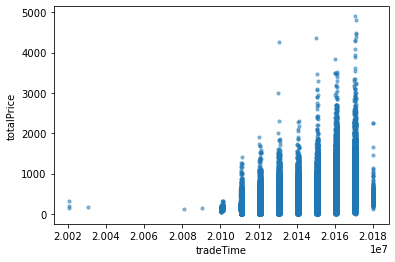

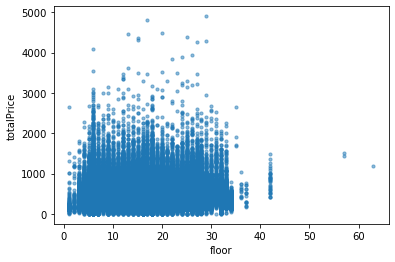

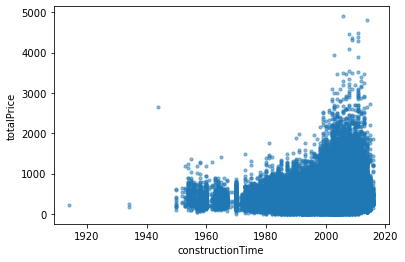

In [20]:
#although tradeTime, floor, and constructionTime are categorical features technically, 
# I apply two columns cts and cts to them again to see the relationship between them and the target variable clearly. 
list_cate_to_cts = ['tradeTime', 'floor', 'constructionTime']
for i in list_cate_to_cts:
    df.plot.scatter(i,'totalPrice',alpha=0.5,s=10)
    plt.show()

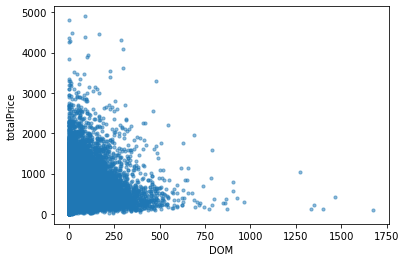

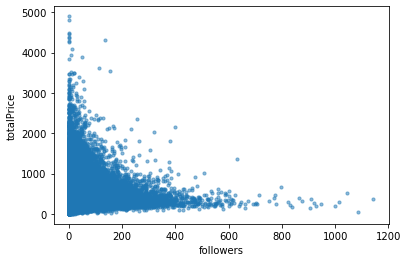

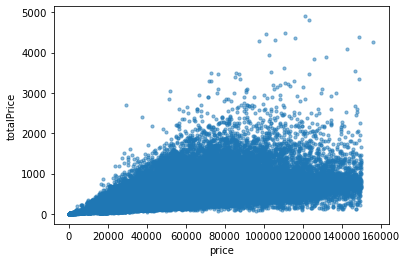

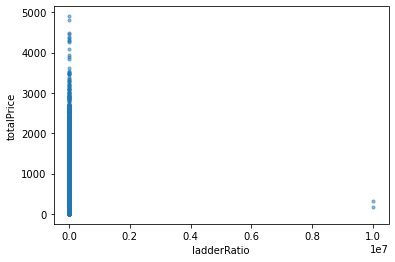

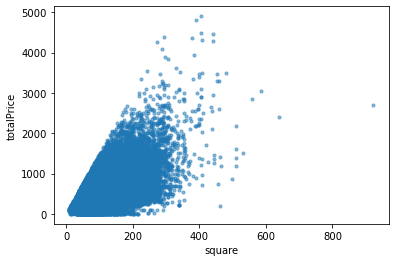

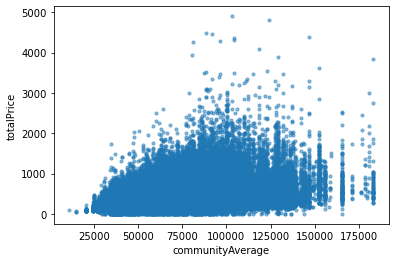

In [21]:
# continuous and continuous columns, can use scatter and heatmap. Scatter is better here

for i in list_cts:
    df.plot.scatter(i,'totalPrice',alpha=0.5,s=10)
    plt.show()

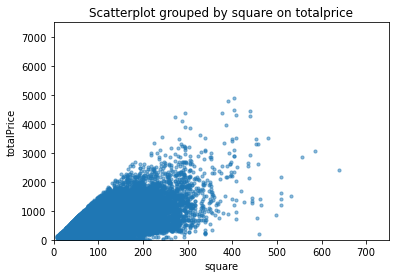

In [22]:
df.plot.scatter('square','totalPrice',alpha=0.5,s=10)
plt.axis([0,750,0,7500])
plt.title("Scatterplot grouped by square on totalprice")
plt.show()

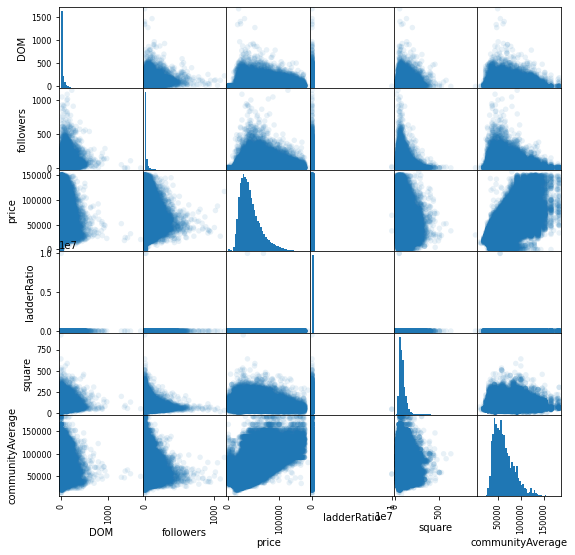

In [23]:
pd.plotting.scatter_matrix(df[['DOM', 'followers', 'price', 'ladderRatio','square','communityAverage']], figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

# Data Processing

In [24]:
#split into groups
from sklearn.model_selection import train_test_split
from decimal import *

y = df['totalPrice'] 
X = df.loc[:, df.columns != 'totalPrice']

def basic_split(X,y,train_size,val_size,test_size,random_state):
    if Decimal(str(train_size)) + Decimal(str(val_size)) + Decimal(str(test_size)) == Decimal(str(1)):
        if isinstance(random_state, int)==True:
            # first split to separate out the training set
            X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = train_size,random_state = random_state)
            # second split to separate out the validation and test sets
            X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = val_size/(1-train_size),random_state = random_state)
        else:
            raise ValueError("Error")
    else:
        raise ValueError("Error")

    #print(X_train.size, y_train.size, X_val.size, y_val.size, X_test.size, y_test.size)
    return X_train, y_train, X_val, y_val, X_test, y_test
    #print("X_train.head:",X_train.head(), "y_train.head:", y_train.head(), "X_val.head:",X_val.head(), "y_val.head:", y_val.head(), "X_test.head:", X_test.head(), "y_test.head:",y_test.head())

random_state = 42
train_size = 0.6
val_size = 0.2
test_size = 0.2
X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y,train_size,val_size,test_size,random_state)
print("done")

done


In [25]:
#transform

#continuous data: tradeTime, DOM, followers, price, square, ladderRatio,communityAverage
#Hard to say there is a scale for these feature, so I choose Standard.
from sklearn.preprocessing import StandardScaler

std_ftrs = ['tradeTime','DOM','followers','price','square','ladderRatio','communityAverage','constructionTime']
scaler = StandardScaler()
print(scaler.fit_transform(X_train[std_ftrs]))
print(scaler.transform(X_val[std_ftrs]))
print(scaler.transform(X_test[std_ftrs]))

[[-1.65389641         nan -0.49151999 ... -0.2704902  -0.76884569
   0.31760799]
 [ 1.36399762 -0.41711486  1.28094174 ... -0.7410486  -0.66539092
   0.43174951]
 [-1.0621596  -0.55878238 -0.49151999 ... -0.7410486  -0.3019315
  -1.2803734 ]
 ...
 [-1.65425929         nan -0.49151999 ... -0.2704902  -0.14121113
  -0.36724118]
 [ 0.70512795 -0.55878238 -0.22565073 ... -0.7410486  -0.15390194
  -0.25309965]
 [-1.69707916         nan -0.49151999 ... -0.7410486  -0.19793861
  -0.13895812]]
[[-0.45657285         nan -0.34381485 ... -1.02451751 -0.29596727
  -0.59552423]
 [-1.10395131         nan -0.49151999 ... -0.03237631  0.28256327
   0.66003257]
 [ 0.75327007 -0.47782951  0.04021853 ...  3.51098511  1.23101074
   0.88831562]
 ...
 [-1.0427455  -0.55878238 -0.34381485 ... -0.7410486   0.39458321
          nan]
 [ 0.74026686  1.70789806  1.78313923 ... -1.211607    0.30830364
  -0.13895812]
 [ 0.1183505          nan -0.49151999 ... -0.03237631 -0.53601641
   0.43174951]]
[[-0.48723624    

In [26]:
#categorical feature: 
#OneHot: buildingType, renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district
from sklearn.preprocessing import OneHotEncoder
onehot_ftrs = ['buildingType','renovationCondition','buildingStructure','elevator','fiveYearsProperty','subway','district']
# initialize the encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array
# fit the training data
enc.fit(X_train[onehot_ftrs])
print('feature names:',enc.get_feature_names(onehot_ftrs))
print(len(enc.get_feature_names(onehot_ftrs)))

# transform X_train
onehot_train = enc.transform(X_train[onehot_ftrs])
print('transformed train features:')
print(onehot_train)
# transform X_val
onehot_val = enc.transform(X_val[onehot_ftrs])
print('transformed val features:')
print(onehot_val)
# transform X_test
onehot_test = enc.transform(X_test[onehot_ftrs])
print('transformed test features:')
print(onehot_test)

feature names: ['buildingType_1.0' 'buildingType_2.0' 'buildingType_3.0'
 'buildingType_4.0' 'renovationCondition_1' 'renovationCondition_2'
 'renovationCondition_3' 'renovationCondition_4' 'buildingStructure_1'
 'buildingStructure_2' 'buildingStructure_3' 'buildingStructure_4'
 'buildingStructure_5' 'buildingStructure_6' 'elevator_0.0' 'elevator_1.0'
 'fiveYearsProperty_0.0' 'fiveYearsProperty_1.0' 'subway_0.0' 'subway_1.0'
 'district_1' 'district_2' 'district_3' 'district_4' 'district_5'
 'district_6' 'district_7' 'district_8' 'district_9' 'district_10'
 'district_11' 'district_12' 'district_13']
33
transformed train features:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
transformed val features:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
transformed test features

In [27]:
#odinal
#livingRoom, drawingRoom, kitchen, bathroom, and floor
#construction time is not fitted for here, I moved it to cts, even though it should be a cate feature
from sklearn.preprocessing import OrdinalEncoder
ordinal_ftrs = ['livingRoom','drawingRoom','kitchen','bathRoom','floor'] 
ordinal_cats = [['0.0','1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0'],['0.0','1.0','2.0','3.0','4.0','5.0'],['0','1','2','3'],['0.0','1.0','2.0','3.0','4.0','5.0','6.0','7.0'],['1.0','2.0','3.0', '4.0', '5.0','6.0', '7.0', '8.0', '9.0', '10.0','11.0','12.0','13.0','14.0','15.0','16.0','17.0','18.0','19.0','20.0','21.0','22.0','23.0','24.0','25.0','26.0','27.0','28.0','29.0','30.0','31.0','32.0','33.0','34.0','35.0','36.0','37.0','42.0','57.0','63.0']]
enc = OrdinalEncoder(categories = ordinal_cats)  
enc.fit(X_train[ordinal_ftrs]) 
ordinal_train = enc.transform(X_train[ordinal_ftrs])
print('transformed train features:')
print(ordinal_train)
ordinal_val = enc.transform(X_val[ordinal_ftrs])
print('transformed validation features:')
print(ordinal_val)
ordinal_test = enc.transform(X_test[ordinal_ftrs])
print('transformed test features:')
print(ordinal_test)

transformed train features:
[[ 1.  1.  1.  1.  5.]
 [ 2.  1.  1.  1. 21.]
 [ 1.  1.  1.  1. 16.]
 ...
 [ 2.  1.  1.  1. 15.]
 [ 3.  2.  1.  1. 29.]
 [ 1.  1.  1.  1. 23.]]
transformed validation features:
[[ 2.  1.  1.  1. 15.]
 [ 1.  0.  1.  1. 20.]
 [ 2.  1.  1.  2. 24.]
 ...
 [ 2.  1.  1.  1. 16.]
 [ 1.  1.  1.  1. 23.]
 [ 3.  2.  1.  2. 21.]]
transformed test features:
[[ 2.  1.  1.  1. 23.]
 [ 2.  1.  1.  1. 17.]
 [ 3.  1.  1.  1.  5.]
 ...
 [ 2.  1.  1.  1.  5.]
 [ 2.  2.  1.  2. 17.]
 [ 1.  1.  1.  1.  5.]]
